## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for  i ,n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units=n_units,activation="relu",name = "hidden_layer"+str(i+1))(input_layer)
            
            x = BatchNormalization()(x)
        else :
            x = keras.layers.Dense(units=n_units , activation="relu",name = "hidden_layer"+str(i+1))(x)
            
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units , activation="softmax", name = "output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs = [out])
    
    
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [10]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]


"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.2,0.5]
redice_lr_patient = [3,5]

In [11]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor,
                                  min_lr=1e-12 , 
                                  monitor="val_loss", 
                                  patience=reduce_patient ,
                                  verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.20, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 2s 43us/step - loss: 1.5713 - acc: 0.4537 - val_loss: 1.6687 - val_acc: 0.4212
Epoch 12/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.5521 - acc: 0.4594 - val_loss: 1.6527 - val_acc: 0.4252
Epoch 13/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.5335 - acc: 0.4664 - val_loss: 1.6463 - val_acc: 0.4270
Epoch 14/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.5172 - acc: 0.4711 - val_loss: 1.6346 - val_acc: 0.4309
Epoch 15/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.5013 - acc: 0.4780 - val_loss: 1.6221 - val_acc: 0.4342
Epoch 16/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.4865 - acc: 0.4830 - val_loss: 1.6125 - val_acc: 0.4363
Epoch 17/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.4719 - acc: 0.4870 - val_loss: 1.6055 - val_acc: 0.4397
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 64us/step - loss: 2.5615 - acc: 0.1921 - val_loss: 2.4363 - val_acc: 0.2509
Epoch 2/25
50000/50000 [==============================] - 2s 43us/step - loss: 2.0799 - acc: 0.2980 - val_loss: 2.0926 - val_acc: 0.3050
Epoch 3/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.9159 - acc: 0.3421 - val_loss: 1.9626 - val_acc: 0.3379
Epoch 4/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.8259 - acc: 0.3679 - val_loss: 1.8872 - val_acc: 0.3553
Epoch 5/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.7687 - acc: 0.3859 - val_loss: 1.8388 - val_acc: 0.3664
Epoch 6/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.7226 - acc: 0.4006 - val_loss: 1.8007 - val_acc: 0.3775
Epoch 7/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.6843 - acc: 0.4134 - val_loss: 1.7694 - val_acc

50000/50000 [==============================] - 2s 45us/step - loss: 0.7555 - acc: 0.7544 - val_loss: 1.3163 - val_acc: 0.5451
Epoch 23/25
50000/50000 [==============================] - 2s 45us/step - loss: 0.7547 - acc: 0.7544 - val_loss: 1.3181 - val_acc: 0.5450
Epoch 24/25
50000/50000 [==============================] - 2s 44us/step - loss: 0.7535 - acc: 0.7543 - val_loss: 1.3188 - val_acc: 0.5435

Epoch 00024: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Epoch 25/25
50000/50000 [==============================] - 2s 43us/step - loss: 0.7506 - acc: 0.7545 - val_loss: 1.3194 - val_acc: 0.5450
Numbers of exp: 5, reduce_factor: 0.20, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1

50000/50000 [==============================] - 2s 44us/step - loss: 1.9134 - acc: 0.3440 - val_loss: 1.9698 - val_acc: 0.3306
Epoch 10/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.8943 - acc: 0.3479 - val_loss: 1.9521 - val_acc: 0.3343
Epoch 11/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.8769 - acc: 0.3550 - val_loss: 1.9368 - val_acc: 0.3388
Epoch 12/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.8621 - acc: 0.3592 - val_loss: 1.9231 - val_acc: 0.3441
Epoch 13/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.8477 - acc: 0.3627 - val_loss: 1.9103 - val_acc: 0.3458
Epoch 14/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.8343 - acc: 0.3676 - val_loss: 1.8985 - val_acc: 0.3495
Epoch 15/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.8219 - acc: 0.3720 - val_loss: 1.8890 - val_acc: 0.3521
Epoch 16/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 73us/step - loss: 1.8024 - acc: 0.3741 - val_loss: 2.1582 - val_acc: 0.3210
Epoch 2/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.5351 - acc: 0.4561 - val_loss: 2.7490 - val_acc: 0.2463
Epoch 3/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.4365 - acc: 0.4924 - val_loss: 2.2594 - val_acc: 0.2849
Epoch 4/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.3597 - acc: 0.5224 - val_loss: 2.1550 - val_acc: 0.3335
Epoch 5/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.2992 - acc: 0.5414 - val_loss: 2.0103 - val_acc: 0.3191
Epoch 6/25
50000/50000 [==============================] - 2s 46us/step - loss: 1.2393 - acc: 0.5601 - val_loss: 2.3521 - val_acc: 0.2588
Epoch 7/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.2008 - acc: 0.5749 - val_loss: 1.8964 - val_acc

50000/50000 [==============================] - 2s 43us/step - loss: 1.0265 - acc: 0.6587 - val_loss: 1.4567 - val_acc: 0.4957
Epoch 23/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.0178 - acc: 0.6639 - val_loss: 1.4549 - val_acc: 0.4961
Epoch 24/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.0127 - acc: 0.6646 - val_loss: 1.4542 - val_acc: 0.4949
Epoch 25/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.0079 - acc: 0.6668 - val_loss: 1.4565 - val_acc: 0.4940
Numbers of exp: 10, reduce_factor: 0.50, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch

Epoch 10/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.7091 - acc: 0.4087 - val_loss: 1.7881 - val_acc: 0.3850
Epoch 11/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.6830 - acc: 0.4171 - val_loss: 1.7644 - val_acc: 0.3932
Epoch 12/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.6588 - acc: 0.4254 - val_loss: 1.7454 - val_acc: 0.4011
Epoch 13/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.6387 - acc: 0.4319 - val_loss: 1.7310 - val_acc: 0.4057
Epoch 14/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.6196 - acc: 0.4384 - val_loss: 1.7265 - val_acc: 0.4083
Epoch 15/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.6015 - acc: 0.4457 - val_loss: 1.7064 - val_acc: 0.4120
Epoch 16/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.5846 - acc: 0.4510 - val_loss: 1.6943 - val_acc: 0.4162
Epoch 17/25
50000/50000 [=========

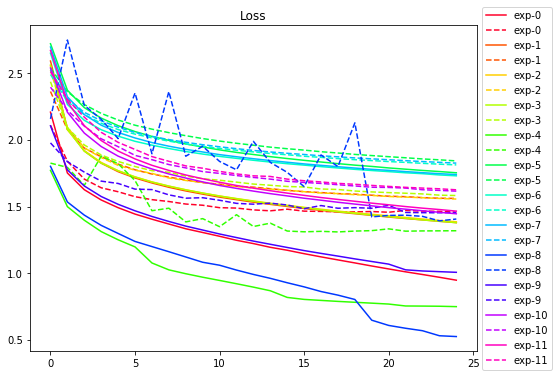

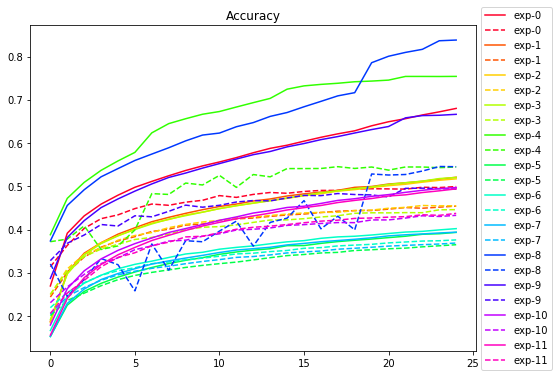

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()